In [1]:
import gym

# from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, DDPG
from stable_baselines.ddpg.policies import MlpPolicy

env = gym.make('MountainCarContinuous-v0')
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

model = DDPG(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000)


ModuleNotFoundError: No module named 'stable_baselines'

In [1]:
import gym
import rec_gym
from rec_gym.wrappers import StatsWrapper, FlattenObservationsWrapper
from rec_gym.envs import GeneratedRecEnv

env = StatsWrapper(GeneratedRecEnv(
     n_items = 100,
    n_users = 10,
    n_rec = 4,
    embedding_dimension = 2,
    user_change_prob = 0.05,
    reward_noise = 0.05,
    user_initial_n_clusters = 2,
    user_init_sigma  = 2,
    user_cluster_sigma = 4,
    user_ar_coef = 0.9,
    user_drift_sigma = 0.3,
    initial_n_clusters = 5,
    cluster_var = 4,
    in_cluster_var = 2,
    new_items_interval = 100,
    new_items_size = 0.2,
    click_prob_type = 'normal',
    user_preference_type = 'static'
))

import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(env.render(mode='rgb_array'))

ModuleNotFoundError: No module named 'gym'

In [2]:
from rec_gym.wrappers import BaselinesWrapper, EmbBaselinesWrapper
from copy import deepcopy

In [53]:
base_env = StatsWrapper(GeneratedRecEnv(
    n_items = 100,
    n_users = 10,
    n_rec = 4,
    embedding_dimension = 2,
    user_change_prob = 0.05,
    reward_noise = 0.05,
    user_initial_n_clusters = 2,
    user_init_sigma  = 2,
    user_cluster_sigma = 4,
    user_ar_coef = 0.9,
    user_drift_sigma = 0.3,
    initial_n_clusters = 5,
    cluster_var = 4,
    in_cluster_var = 2,
    new_items_interval = 100,
    new_items_size = 0.2,
    click_prob_type = 'normal',
    user_preference_type = 'static'
))

base_env = StatsWrapper(gym.make('MovieLens-v2'))

/home/anton/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [63]:
env = EmbBaselinesWrapper(deepcopy(base_env))

In [64]:
import gym

# from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2, DDPG
from stable_baselines.ddpg.policies import MlpPolicy


In [65]:
env.observation_space

Box(20,)

In [66]:
env.reset()

array([ 0.08596605,  0.17283795, -0.46947306, -0.14694378,  0.01643797,
       -0.30502802, -0.19198352,  1.24402049,  0.462464  ,  0.22504422,
        1.22652677, -0.14916421,  0.10802123,  0.17108861, -0.21589524,
        0.56100609, -0.37801832, -0.30370337, -0.2369187 , -0.13166487])

In [67]:
model = DDPG(MlpPolicy, env, verbose=2, batch_size=32, nb_train_steps=2, nb_rollout_steps=5, memory_limit=100)
model.learn(total_timesteps=4000)

setting up target updates ...
  target/pi/fc0/kernel:0 <- model/pi/fc0/kernel:0
  target/pi/fc0/bias:0 <- model/pi/fc0/bias:0
  target/pi/fc1/kernel:0 <- model/pi/fc1/kernel:0
  target/pi/fc1/bias:0 <- model/pi/fc1/bias:0
  target/pi/pi/kernel:0 <- model/pi/pi/kernel:0
  target/pi/pi/bias:0 <- model/pi/pi/bias:0
  target/qf/fc0/kernel:0 <- model/qf/fc0/kernel:0
  target/qf/fc0/bias:0 <- model/qf/fc0/bias:0
  target/qf/fc1/kernel:0 <- model/qf/fc1/kernel:0
  target/qf/fc1/bias:0 <- model/qf/fc1/bias:0
  target/qf/qf/kernel:0 <- model/qf/qf/kernel:0
  target/qf/qf/bias:0 <- model/qf/qf/bias:0
setting up actor optimizer
  actor shapes: [[20, 64], [64], [64, 64], [64], [64, 20], [20]]
  actor params: 6804
setting up critic optimizer
  critic shapes: [[20, 64], [64], [84, 64], [64], [64, 1], [1]]
  critic params: 6849
Using agent with the following configuration:
dict_items([('policy', <class 'stable_baselines.ddpg.policies.MlpPolicy'>), ('env', <EmbBaselinesWrapper<StatsWrapper<MovieLens<M

--------------------------------------
| reference_Q_mean        | 1.43     |
| reference_Q_std         | 0.328    |
| reference_action_mean   | -0.0284  |
| reference_action_std    | 0.156    |
| reference_actor_Q_mean  | 1.47     |
| reference_actor_Q_std   | 0.336    |
| rollout/Q_mean          | 0.8      |
| rollout/actions_mean    | -0.0261  |
| rollout/actions_std     | 0.158    |
| rollout/episode_steps   | 1.04     |
| rollout/episodes        | 482      |
| rollout/return          | 0.904    |
| rollout/return_history  | 1.24     |
| total/duration          | 2.81     |
| total/episodes          | 482      |
| total/epochs            | 1        |
| total/steps             | 497      |
| total/steps_per_second  | 177      |
| train/loss_actor        | -1.46    |
| train/loss_critic       | 0.478    |
| train/param_noise_di... | 0        |
--------------------------------------

--------------------------------------
| reference_Q_mean        | 0.731    |
| reference_Q_std       

In [68]:
from collections import defaultdict
# [EnvId][Agent] = Interactions
results = defaultdict(dict)
results['GeneratedRecEnv']['DDPG'] = env.env.interactions

In [69]:
from agents.baselines import RandomAgent, DotProdAgent, MFAgent, DotProdAgent
from rec_gym.runner import run_experiment
def prepare_random_agent_and_env(base_env):
    env = deepcopy(base_env)
    wrapped = FlattenObservationsWrapper(env)
    action_size = env.unwrapped.n_rec
    agent = RandomAgent(action_size = action_size)    
    return agent, wrapped, env

agent, wrapped, statenv = prepare_random_agent_and_env(base_env)
run_experiment(wrapped, agent, t_train=4000, t_test=0)
results['GeneratedRecEnv']['Random2'] = statenv.interactions

100%|██████████| 4000/4000 [00:01<00:00, 2218.25it/s]
0it [00:00, ?it/s]


In [72]:
def prepare_dotprod_agent_and_env(base_env):
    env = deepcopy(base_env)
    wrapped = FlattenObservationsWrapper(env)
    unwrapped = env.unwrapped

    state_dim = unwrapped.embedding_dimension
    action_dim = unwrapped.embedding_dimension
    action_size = unwrapped.n_rec

    agent = DotProdAgent(n_rec=action_size)
    return agent, wrapped, env

agent, wrapped, statenv = prepare_dotprod_agent_and_env(base_env)
run_experiment(wrapped, agent, t_train=4000, t_test=0)
results['GeneratedRecEnv']['DorProd'] = statenv.interactions

100%|██████████| 4000/4000 [00:02<00:00, 1491.49it/s]
0it [00:00, ?it/s]


In [77]:
import tensorflow as tf
from agents.ddpg import DDPGAgent
def prepare_ddpg_agent_and_env(base_env):
    env = deepcopy(base_env)
    wrapped = FlattenObservationsWrapper(env)
    unwrapped = env.unwrapped

    state_dim = unwrapped.embedding_dimension
    action_dim = unwrapped.embedding_dimension
    action_size = unwrapped.n_rec


    tf.reset_default_graph()
    sess = tf.InteractiveSession()
    agent = DDPGAgent(action_size = action_size,
                     state_dim = state_dim,
                     action_dim = action_dim,
                     gamma = .9,
                     sess = sess,
                     optimizer = tf.train.AdamOptimizer(
                         learning_rate=0.01
                     ),
                     max_tf_checkpoints_to_keep = 3,
                     experience_size = 300,
                     per = True,
                     batch_size = 64, 
                     start_steps = 400)
    sess.run(tf.global_variables_initializer())
    return agent, wrapped, env

agent, wrapped, statenv = prepare_ddpg_agent_and_env(base_env)
run_experiment(wrapped, agent, t_train=4000, t_test=0)
results['GeneratedRecEnv']['DDPG_my'] = statenv.interactions

Using TensorFlow backend.
/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
  2%|▏         | 61/4000 [00:00<00:06, 605.44it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/utils.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  max_weight = (p_min * n) ** (-self.PER_b)
100%|██████████| 4000/4000 [05:40<00:00, 14.22it/s]
0it [00:00, ?it/s]


In [70]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import seaborn

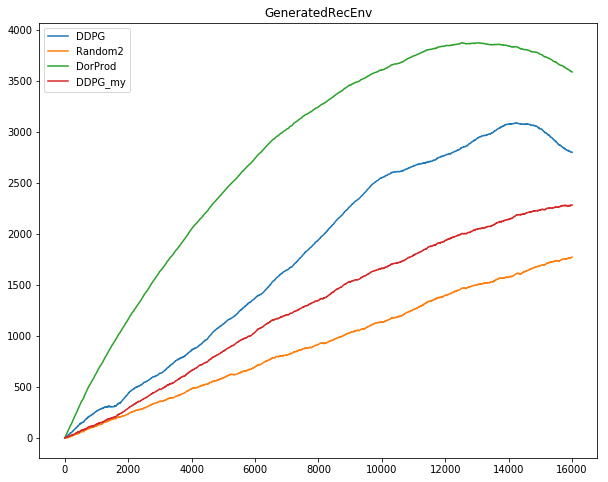

In [78]:
for envid, res in results.items():
    
    plt.figure(figsize=(10, 8))
    
    for agent_name, interactions in res.items():
        rewards = []
        for i in interactions:
            rewards.extend(i.rewards)
        
        plt.plot(np.cumsum(rewards), label=agent_name)
    
    plt.legend()
    plt.title(envid)

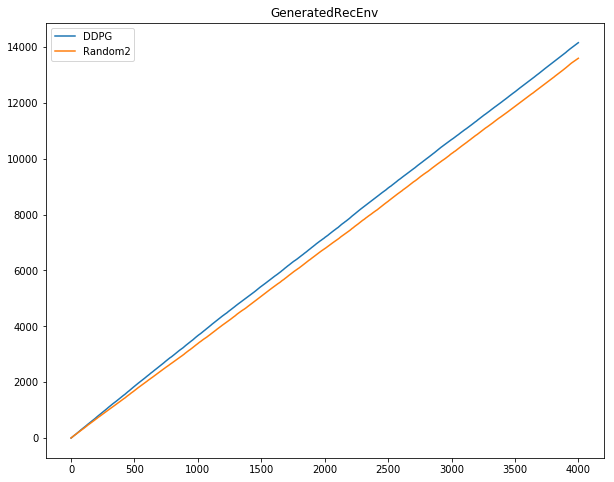

In [42]:


for envid, res in results.items():
    
    plt.figure(figsize=(10, 8))
    
    for agent_name, interactions in res.items():
        rewards = []
        for i in interactions:
            rewards.extend(i.rewards)
        
        plt.plot(np.cumsum(rewards), label=agent_name)
    
    plt.legend()
    plt.title(envid)

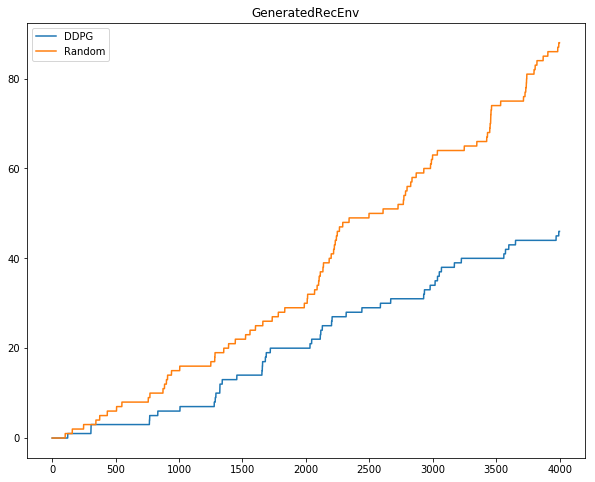

In [64]:


for envid, res in results.items():
    
    plt.figure(figsize=(10, 8))
    
    for agent_name, interactions in res.items():
        rewards = []
        for i in interactions:
            rewards.extend(i.rewards)
        
        plt.plot(np.cumsum(rewards), label=agent_name)
    
    plt.legend()
    plt.title(envid)